In [54]:
import os
import folderstats
import matplotlib.pyplot as plt
import squarify
import numpy as np
import datetime

folder = '/home/arnold/raindrop-detection-cnn/ALL/scattered'
filepaths = [os.path.join(folder, f) for f in os.listdir(folder)]

#print(os.stat(folder))

df = folderstats.folderstats(folder, ignore_hidden=True)
df
#only look at folders
# df[df['folder']]


,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151210T214001_ESSX,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151227T163001_ESSX,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151211T115501_ESSX,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151209T113501_ESSX,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151216T115002_ESSX,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501
5,7,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151209T114501_ESSX,jpg,63536,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501
6,8,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151209T214501_ESSX,jpg,65790,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501
7,9,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151208T214501_ESSX,jpg,72245,2020-10-06 20:35:42,2020-10-06 17:45:20,2020-10-06 19:11:18,False,NaN,0,1,501
8,10,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151212T214001_ESSX,jpg,64664,2020-10-06 18:15:22,2020-10-06 17:45:45,2020-10-06 19:11:18,False,NaN,0,1,501
9,11,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,20151213T214001_ESSX,jpg,68678,2020-10-06 18:15:23,2020-10-06 17:45:28,2020-10-06 19:11:18,False,NaN,0,1,501


In [47]:
date_time_str = '20151207T125501'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y%m%dT%H%M%S')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2015-12-07
Time: 12:55:01
Date-time: 2015-12-07 12:55:01


In [55]:
# dropping null value columns to avoid errors 
# data.dropna(inplace = True) 
  
# new data frame with split value columns to seperate time from name
new = df["name"].str.split("_", n = 1, expand = True) 
# print(new)
# making separate date column from new data frame and merge into orignal df
df["date"]= new[0] 
  
# making separate name column from new data frame and merge into orignal df
df["site_name"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["name"], inplace = True) 
  
# df display 
df 

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,date,site_name
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501,20151210T214001,ESSX
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501,20151227T163001,ESSX
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501,20151211T115501,ESSX
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T113501,ESSX
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501,20151216T115002,ESSX
5,7,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63536,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T114501,ESSX
6,8,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,65790,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T214501,ESSX
7,9,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,72245,2020-10-06 20:35:42,2020-10-06 17:45:20,2020-10-06 19:11:18,False,NaN,0,1,501,20151208T214501,ESSX
8,10,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,64664,2020-10-06 18:15:22,2020-10-06 17:45:45,2020-10-06 19:11:18,False,NaN,0,1,501,20151212T214001,ESSX
9,11,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68678,2020-10-06 18:15:23,2020-10-06 17:45:28,2020-10-06 19:11:18,False,NaN,0,1,501,20151213T214001,ESSX


In [62]:
#drop broken rows
df = df.drop(index=35, axis=0)
df

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,date,site_name
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501,20151210T214001,ESSX
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501,20151227T163001,ESSX
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501,20151211T115501,ESSX
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T113501,ESSX
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501,20151216T115002,ESSX
5,7,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63536,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T114501,ESSX
6,8,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,65790,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T214501,ESSX
7,9,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,72245,2020-10-06 20:35:42,2020-10-06 17:45:20,2020-10-06 19:11:18,False,NaN,0,1,501,20151208T214501,ESSX
8,10,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,64664,2020-10-06 18:15:22,2020-10-06 17:45:45,2020-10-06 19:11:18,False,NaN,0,1,501,20151212T214001,ESSX
9,11,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68678,2020-10-06 18:15:23,2020-10-06 17:45:28,2020-10-06 19:11:18,False,NaN,0,1,501,20151213T214001,ESSX


In [68]:
import pandas as pd

# converting the string to datetime format 
# df['Dates'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') 
df['Dates'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S') 
df

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,date,site_name,Dates
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501,20151210T214001,ESSX,2015-12-10 21:40:01
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501,20151227T163001,ESSX,2015-12-27 16:30:01
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501,20151211T115501,ESSX,2015-12-11 11:55:01
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T113501,ESSX,2015-12-09 11:35:01
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501,20151216T115002,ESSX,2015-12-16 11:50:02
5,7,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63536,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T114501,ESSX,2015-12-09 11:45:01
6,8,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,65790,2020-10-06 18:15:20,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T214501,ESSX,2015-12-09 21:45:01
7,9,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,72245,2020-10-06 20:35:42,2020-10-06 17:45:20,2020-10-06 19:11:18,False,NaN,0,1,501,20151208T214501,ESSX,2015-12-08 21:45:01
8,10,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,64664,2020-10-06 18:15:22,2020-10-06 17:45:45,2020-10-06 19:11:18,False,NaN,0,1,501,20151212T214001,ESSX,2015-12-12 21:40:01
9,11,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68678,2020-10-06 18:15:23,2020-10-06 17:45:28,2020-10-06 19:11:18,False,NaN,0,1,501,20151213T214001,ESSX,2015-12-13 21:40:01


In [69]:
#create a new column with year of date field
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,date,site_name,Dates,year
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501,20151210T214001,ESSX,2015-12-10 21:40:01,2015
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501,20151227T163001,ESSX,2015-12-27 16:30:01,2015
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501,20151211T115501,ESSX,2015-12-11 11:55:01,2015
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T113501,ESSX,2015-12-09 11:35:01,2015
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501,20151216T115002,ESSX,2015-12-16 11:50:02,2015


In [73]:
#create a new column with month of date field
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,date,site_name,Dates,year,month
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501,20151210T214001,ESSX,2015-12-10 21:40:01,2015,12
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501,20151227T163001,ESSX,2015-12-27 16:30:01,2015,12
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501,20151211T115501,ESSX,2015-12-11 11:55:01,2015,12
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T113501,ESSX,2015-12-09 11:35:01,2015,12
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501,20151216T115002,ESSX,2015-12-16 11:50:02,2015,12


In [74]:
#since we have datetime obj, can extract the day/month/year using the to_period function
#where 'D', 'M', 'Y' are inputs
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,id,path,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid,date,site_name,Dates,year,month,month_year
0,2,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,63393,2020-10-06 18:15:21,2020-10-06 17:45:51,2020-10-06 19:11:17,False,NaN,0,1,501,20151210T214001,ESSX,2015-12-10 21:40:01,2015,12,2015-12
1,3,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89871,2020-10-06 20:28:03,2020-10-06 17:44:57,2020-10-06 19:11:17,False,NaN,0,1,501,20151227T163001,ESSX,2015-12-27 16:30:01,2015,12,2015-12
2,4,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,70525,2020-10-06 20:35:41,2020-10-06 17:46:16,2020-10-06 19:11:18,False,NaN,0,1,501,20151211T115501,ESSX,2015-12-11 11:55:01,2015,12,2015-12
3,5,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,89312,2020-10-06 20:35:43,2020-10-06 17:45:31,2020-10-06 19:11:18,False,NaN,0,1,501,20151209T113501,ESSX,2015-12-09 11:35:01,2015,12,2015-12
4,6,/home/arnold/raindrop-detection-cnn/ALL/rain/2...,jpg,68243,2020-10-06 20:28:00,2020-10-06 17:46:03,2020-10-06 19:11:18,False,NaN,0,1,501,20151216T115002,ESSX,2015-12-16 11:50:02,2015,12,2015-12


In [76]:
#drop cols that are not needed
# Dropping old Name columns 
df.drop(columns =["id", "extension", "atime", "mtime", "ctime", "folder", "depth", "parent", "uid"], inplace = True) 
df.head()

KeyError: "['id' 'extension' 'atime' 'mtime' 'ctime' 'depth' 'parent' 'uid'] not found in axis"

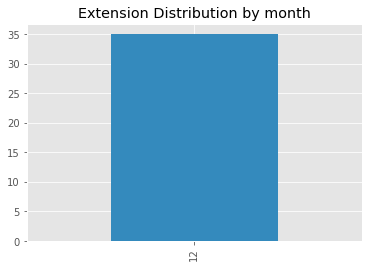

In [77]:
#show distribution by month
with plt.style.context('ggplot'):
    df['month'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by month');

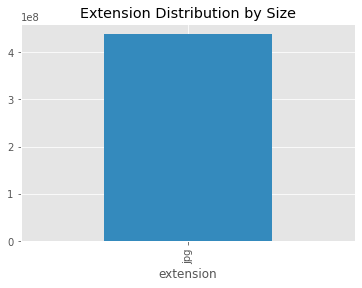

In [24]:
#show distribution by file size
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    extension_sizes.plot(
        kind='bar', color='C1', title='Extension Distribution by Size');

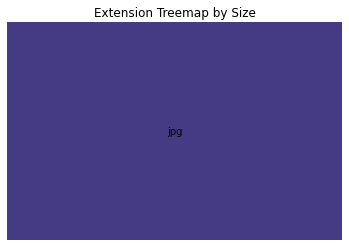

In [23]:
#Tree map

# Group by extension and sum all sizes for each extension
extension_sizes = df.groupby('extension')['size'].sum()
# Sort elements by size
extension_sizes = extension_sizes.sort_values(ascending=False)

squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
plt.title('Extension Treemap by Size')
plt.axis('off');

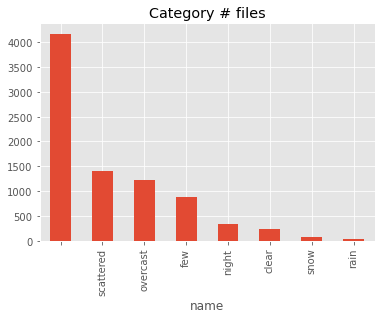

In [35]:
with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df[df['folder']]
    # Set the name to be the index (so we can use it as a label later)
    df_folders.set_index('name', inplace=True)
    # Sort the folders by size
    df_folders = df_folders.sort_values(by='num_files', ascending=False)
    
    # Show the size of the largest 50 folders as a bar plot
    df_sizes['num_files'][:50].plot(kind='bar', color='C0', title='Category # files');

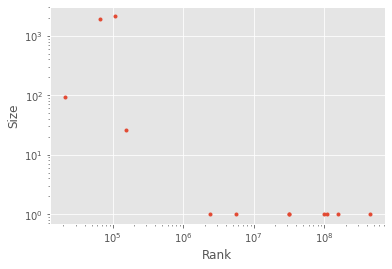

In [27]:
with plt.style.context('ggplot'):
    y, bins = np.histogram(df['size'], bins=10000)
    plt.loglog(bins[:-1], y, '.');
    plt.ylabel('Size')
    plt.xlabel('Rank')


In [29]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
#nodes (files and folders)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4180
Number of edges: 4179
Average degree:   1.9995


In [30]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

FileNotFoundError: [Errno 2] "dot" not found in path.

In [31]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');

FileNotFoundError: [Errno 2] "twopi" not found in path.